In [33]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [34]:
vocab_size=10000
maxlen=200
(x_train,y_train),(x_test,y_test)  = imdb.load_data(num_words=vocab_size)

In [35]:
x_train=pad_sequences(x_train,maxlen=maxlen)
x_test=pad_sequences(x_test,maxlen=maxlen)

In [36]:
model=keras.Sequential([ 
    layers.Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen), 
    layers.GlobalAveragePooling1D(), 
    layers.Dense(64,activation='relu'), 
    layers.Dense(1,activation='sigmoid') 
])

In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
history=model.fit(x_train,y_train,epochs=10,batch_size=512,validation_split=0.2,verbose=1)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5872 - loss: 0.6889 - val_accuracy: 0.7240 - val_loss: 0.6582
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7358 - loss: 0.6361 - val_accuracy: 0.7966 - val_loss: 0.5459
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8141 - loss: 0.5095 - val_accuracy: 0.8316 - val_loss: 0.4266
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8556 - loss: 0.3887 - val_accuracy: 0.8510 - val_loss: 0.3635
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8764 - loss: 0.3233 - val_accuracy: 0.8528 - val_loss: 0.3433
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8800 - loss: 0.2962 - val_accuracy: 0.8684 - val_loss: 0.3147
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9000 - loss: 0.2619 - val_accuracy: 0.8732 - val_loss: 0.3075
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9102 - loss: 0.2412 - val_accuracy: 0.8764 - v

In [39]:
loss,accuracy=model.evaluate(x_test,y_test,verbose=1)
print(f"accuracy: {accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8744 - loss: 0.2979
accuracy: 0.8738


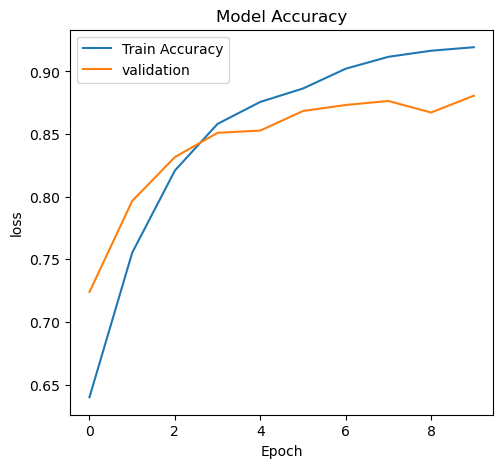

In [40]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label="Train Accuracy")
plt.plot(history.history['val_accuracy'],label="validation")
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()

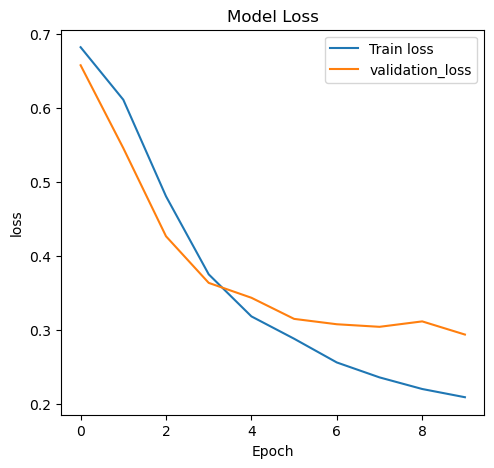

In [41]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.plot(history.history["loss"],label="Train loss")
plt.plot(history.history["val_loss"],label="validation_loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend()